# Capstone Project 2: Milestone Report

## Introduction

This milestone report contains following sections:

* Problem Description
* Data Set Description:
    * Data Visualization
* Data Wrangling: 
    * Data Loading
    * Data Normalization
    * Data Resampling
* Learning Method: 
    * Preprocessing
    * CNN
* Remarks

## Problem Description

### Project Task

The capstone 2 project comes from the kaggle competition "Data Science Bowl 2017" at the following link: https://www.kaggle.com/c/data-science-bowl-2017. The challenge for this year is detecting lung tumor. More specifically, "Participants will develop algorithms that accurately determine when lesions in the lungs are cancerous, using a data set of thousands of high-resolution lung scans provided by the National Cancer Institute."

Given the above description, it is clear that for this project, the objective is:

* Build a model that will detect whether a lung cancer occured.

### Potential Client

According to the project description, 

"This will dramatically reduce the false positive rate that plagues the current detection technology, get patients earlier access to life-saving interventions, and give radiologists more time to spend with their patients."

Because of that, potential clients for this project could be hospitals and health/cancer department of the goverments.

## Data Set Description


### Introduction to the Data Sets

The data can be found at this link: https://www.kaggle.com/c/data-science-bowl-2017/data. It contains images from two stages totaling 220GB. 

The data in stage 1 is used as training set. The images are 150GB in size from 1595 patients. The true labels for this stage is known. The important files in stage1 are:

    stage1.7z: all the CT images in dicom format
    stage1_labels.csv: the csv file with patient id and their tumor status.

The data in stage 2 is used as testing set. The important file in stage2 are:
    
    stage2.7z: all the CT images in dicom format
    
### One Important Note

Since this dataset is too large, I will not put the input in my github folder. If you wish to run it please download it yourself. Note the data dictorary has to be put outside of the project folder and named as "cap2input" in order for the code to run, or not, you can change the content of the INPUT_FOLDER variable.

## Data Summary

In [1]:
import dicom # for reading dicom files
import os # for doing directory operations 
import pandas as pd # for some simple data analysis (right now, just to load in the labels data and quickly reference it)

# Change this to wherever you are storing your data:
# IF YOU ARE FOLLOWING ON KAGGLE, YOU CAN ONLY PLAY WITH THE SAMPLE DATA, WHICH IS MUCH SMALLER

data_dir = '../../cap2input/sample_images/'
patients = os.listdir(data_dir)
labels_df = pd.read_csv('../../cap2input/stage1_labels.csv', index_col=0)

labels_df.head()

,cancer
id,
0015ceb851d7251b8f399e39779d1e7d,1
0030a160d58723ff36d73f41b170ec21,0
003f41c78e6acfa92430a057ac0b306e,0
006b96310a37b36cccb2ab48d10b49a3,1
008464bb8521d09a42985dd8add3d0d2,1


In [2]:
print len(labels_df)

1397


In [3]:
for patient in patients[:1]:
    label = labels_df.at[patient, 'cancer']
    path = data_dir + patient
    
    # a couple great 1-liners from: https://www.kaggle.com/gzuidhof/data-science-bowl-2017/full-preprocessing-tutorial
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    print(len(slices),label)
    print(slices[0])

(280, 0)
(0008, 0000) Group Length                        UL: 362
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7009.9004.220818998329353928137441347625
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0000) Group Length                        UL: 60
(0010, 0010) Patient's Name                      PN: '0bd0e3056cbf23a1cb7f0f0b18446068'
(0010, 0020) Patient ID                          LO: '0bd0e3056cbf23a1cb7f0f0b18446068'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0060) KVP                                 DS: ''
(0020, 0000) Group Length                        UL: 392
(0020, 000d) Study Instance UID                  UI: 2.25.17062309086576606706587560884681601601915389122225987441686
(0020, 000e) Series Instance UID  

In [4]:
for patient in patients[:3]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    
    # a couple great 1-liners from: https://www.kaggle.com/gzuidhof/data-science-bowl-2017/full-preprocessing-tutorial
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    print(slices[0].pixel_array.shape, len(slices))

/home/zexi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


((512, 512), 280)
((512, 512), 221)
((512, 512), 123)


/home/zexi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


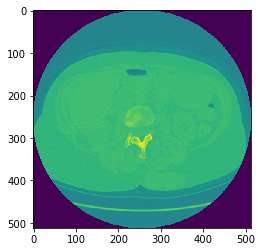

In [5]:


import matplotlib.pyplot as plt

for patient in patients[:1]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    
    #          the first slice
    plt.imshow(slices[0].pixel_array)
    plt.show()



/home/zexi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


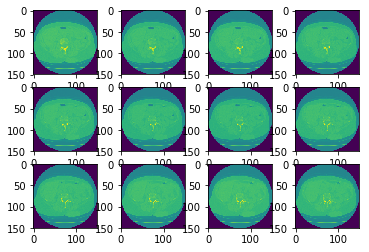

In [6]:


import cv2
import numpy as np

IMG_PX_SIZE = 150

for patient in patients[:1]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    fig = plt.figure()
    for num,each_slice in enumerate(slices[:12]):
        y = fig.add_subplot(3,4,num+1)
        new_img = cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE))
        y.imshow(new_img)
    plt.show()



In [7]:


import math

def chunks(l, n):
    # Credit: Ned Batchelder
    # Link: http://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

def mean(l):
    return sum(l) / len(l)

IMG_PX_SIZE = 150
HM_SLICES = 20

data_dir = '../../cap2input/sample_images/'
patients = os.listdir(data_dir)
labels_df = pd.read_csv('../../cap2input/stage1_labels.csv', index_col=0)

for patient in patients[:10]:
    try:
        label = labels_df.get_value(patient, 'cancer')
        path = data_dir + patient
        slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
        slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
        new_slices = []
        slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]
        chunk_sizes = math.ceil(len(slices) / HM_SLICES)
        for slice_chunk in chunks(slices, chunk_sizes):
            slice_chunk = list(map(mean, zip(*slice_chunk)))
            new_slices.append(slice_chunk)

        print(len(slices), len(new_slices))
    except:
        # some patients don't have labels, so we'll just pass on this for now
        pass



/home/zexi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [17]:
for patient in patients[:10]:
    try:
        label = labels_df.get_value(patient, 'cancer')
        path = data_dir + patient
        slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
        slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
        new_slices = []

        slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]

        chunk_sizes = int(math.ceil(len(slices) / HM_SLICES))


        for slice_chunk in chunks(slices, chunk_sizes):
            slice_chunk = list(map(mean, zip(*slice_chunk)))
            new_slices.append(slice_chunk)
            
        while (len(new_slices) < HM_SLICES):
            new_slices.append(new_slices[-1])
        
        while (len(new_slices) > HM_SLICES):
            new_val = list(map(mean, zip(*[new_slices[HM_SLICES-1],new_slices[HM_SLICES],])))
            del new_slices[HM_SLICES]
            new_slices[HM_SLICES-1] = new_val

#        if len(new_slices) == HM_SLICES-1:
#            new_slices.append(new_slices[-1])

#        if len(new_slices) == HM_SLICES-2:
#            new_slices.append(new_slices[-1])
#            new_slices.append(new_slices[-1])

#        if len(new_slices) == HM_SLICES+2:
#            new_val = list(map(mean, zip(*[new_slices[HM_SLICES-1],new_slices[HM_SLICES],])))
#            del new_slices[HM_SLICES]
#            new_slices[HM_SLICES-1] = new_val

#        if len(new_slices) == HM_SLICES+1:
#            new_val = list(map(mean, zip(*[new_slices[HM_SLICES-1],new_slices[HM_SLICES],])))
#            del new_slices[HM_SLICES]
#            new_slices[HM_SLICES-1] = new_val

        print(len(slices), len(new_slices))
    except Exception as e:
        # again, some patients are not labeled, but JIC we still want the error if something
        # else is wrong with our code
        print(str(e))

/home/zexi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


(280, 20)
(221, 20)
(123, 20)
(164, 20)
(435, 20)
(180, 20)
(128, 20)
(136, 20)
(147, 20)
(126, 20)


/home/zexi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


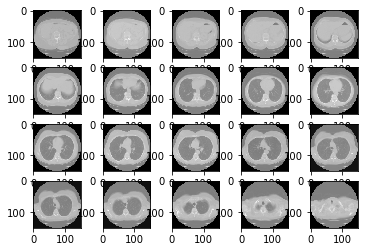

In [12]:
for patient in patients[:1]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    new_slices = []

    slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]
    
    chunk_sizes = int(math.ceil(len(slices) / HM_SLICES))
    for slice_chunk in chunks(slices, chunk_sizes):
        slice_chunk = list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)

    if len(new_slices) == HM_SLICES-1:
        new_slices.append(new_slices[-1])

    if len(new_slices) == HM_SLICES-2:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

    if len(new_slices) == HM_SLICES+2:
        new_val = list(map(mean, zip(*[new_slices[HM_SLICES-1],new_slices[HM_SLICES],])))
        del new_slices[HM_SLICES]
        new_slices[HM_SLICES-1] = new_val
        
    if len(new_slices) == HM_SLICES+1:
        new_val = list(map(mean, zip(*[new_slices[HM_SLICES-1],new_slices[HM_SLICES],])))
        del new_slices[HM_SLICES]
        new_slices[HM_SLICES-1] = new_val
    
    fig = plt.figure()
    for num,each_slice in enumerate(new_slices):
        y = fig.add_subplot(4,5,num+1)
        y.imshow(each_slice, cmap='gray')
    plt.show()